In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [6]:
data=pd.read_csv(r'C:\Users\Neha Nichani\Desktop\Prerna Data Science\KaggleDataSets\letter-recognition.csv')

In [8]:
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [11]:
data.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [13]:
data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [17]:
data.columns

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')

In [19]:
data['letter'].nunique()

26

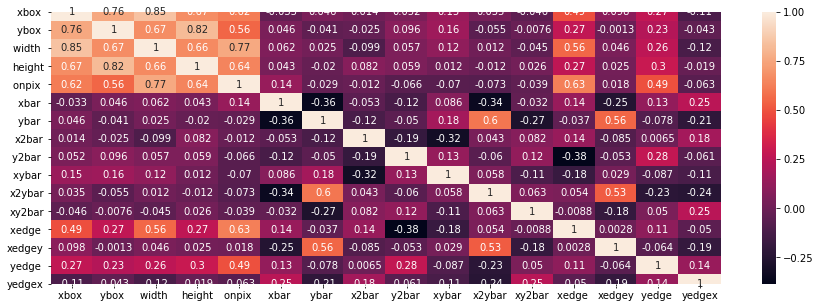

In [24]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True)

In [27]:
round(data.drop('letter', axis=1).mean(), 2)

xbox      4.02
ybox      7.04
width     5.12
height    5.37
onpix     3.51
xbar      6.90
ybar      7.50
x2bar     4.63
y2bar     5.18
xybar     8.28
x2ybar    6.45
xy2bar    7.93
xedge     3.05
xedgey    8.34
yedge     3.69
yedgex    7.80
dtype: float64

In [29]:
X = data.drop("letter", axis = 1)
y = data['letter']

In [31]:
X.shape

(20000, 16)

In [32]:
y.shape

(20000,)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((16000, 16), (4000, 16), (16000,), (4000,))

In [72]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [78]:

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
#print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8545 



In [80]:
non_linear_model = SVC(kernel='poly')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)
#accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.95075 



In [79]:
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)
#accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.9305 



In [93]:
folds = KFold(n_splits = 5, shuffle = True)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [0.1,0.001, 1, 10],
                     'C': [0.1,0.5,1]}]


# specify model
model = SVC(kernel="poly")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  8.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 0.5, 1], 'gamma': [0.1, 0.001, 1, 10]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [95]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.940625 corresponding to hyperparameters {'C': 0.1, 'gamma': 0.1}


In [100]:
# model with optimal hyperparameters

# model
model = SVC(C=0.1, gamma=0.1, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print("prediction", metrics.precision_score(y_test, y_pred,average='micro',pos_label='positive'), "\n")
print("recall", metrics.recall_score(y_test, y_pred,average='micro',pos_label='positive'), "\n")
#print(metrics.confusion_matrix(y_test, y_pred), "\n")


accuracy 0.88675 



C:\Users\Neha Nichani\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


prediction 0.88675 

recall 0.88675 

[[132   0   0   1   0   0   0   0   0   0   1   0  14   0   0   0   0   0
    0   0   0   0   0   0   1   0]
 [  0 134   0   4   0   1   0   0   0   0   2   0   5   0   0   0   0   6
    1   0   0   0   0   0   0   0]
 [  0   0 113   0   5   0   3   1   0   0   2   0   6   0   4   0   0   1
    0   0   2   0   0   0   0   0]
 [  0   0   0 143   0   0   0   3   0   0   2   0   6   0   0   1   0   0
    1   0   0   0   0   0   0   0]
 [  0   0   0   0 129   0   3   0   0   0   3   0   2   0   0   0   1   0
    1   0   0   0   0   0   0   2]
 [  0   0   0   1   1 127   0   1   0   0   1   0   1   0   0   6   0   0
    1   1   0   0   0   0   0   0]
 [  0   1   0   2   0   0 144   0   0   0   3   0   5   0   0   3   0   1
    0   0   0   0   1   0   0   0]
 [  0   2   0   5   0   0   1  93   0   0  24   0   0   0   3   4   0  11
    0   0   0   0   0   0   1   0]
 [  0   0   0   1   0   2   0   0 109  16   2   0   4   0   0   8   0   0
    2   0   0   